In [ ]:
# Loading packages
from google.colab import drive
import os
from torchvision import transforms 
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import torch.optim as optim
import random
from tqdm.notebook import tqdm
import numpy as np

# Also, as we have a auxiliar python file with function, we go to use it
from cnn_functions import *

In [ ]:
# As our dataset is mounted in Google Drive, we need to get access to it.
drive.mount('/content/drive')

# Dataset path. You should change the dataset path to the location that you place the data.
data_dir = '/content/drive/MyDrive/DeepLearning/dataset/'
classes = os.listdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Performing Image Transformations. 
train_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [ ]:
# Checking the dataset training size
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 5400


In [ ]:
# Viewing one of images shape
img, label = dataset[100]
print(img.shape)

torch.Size([3, 224, 224])


In [ ]:
# Setting seed so that value won't change everytime
# Splitting the dataset to training, validation, and testing category
torch.manual_seed(1)
val_size = len(dataset)//20
test_size = len(dataset)//10
train_size = len(dataset) - val_size - test_size

In [ ]:
# Random Splitting
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
# Check the size of each dataset
len(train_ds), len(val_ds),len(test_ds)  

(4590, 270, 540)

In [ ]:
# Define batch size
batch_size = 12
# Define a generator of random values
g_cpu = torch.Generator()
g_cpu.manual_seed(123)
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True,generator  = g_cpu)
val_loader = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)

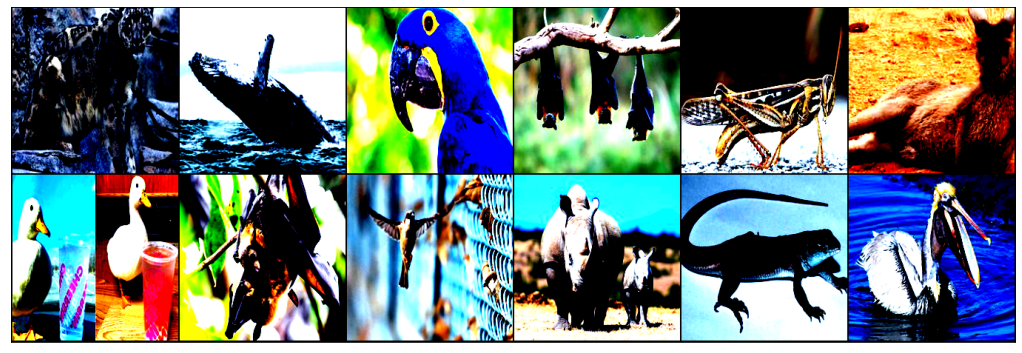

In [ ]:
# We can see some of these images available in one batch
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=6).permute(1, 2, 0))
    break

In [ ]:
# Now, we go to consider some parameters to start to create our models
input_size = torch.randn(1, 3, 224, 224)
output_size = 90

# Pass our data to GPU
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

# **Create MobileNet-v2 Model**

In [ ]:
model_mobilenetv2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)
model_mobilenetv2.Linear = nn.Linear(1280,90)
model_mobilenetv2.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Reporting the Flops of this model
print_model_parm_flops(model_mobilenetv2,input_size, detail=False)

 + Number of FLOPs: 0.60G


# **MobileNet-v2, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.01, epochs:20**

In [ ]:
cnn_sgd_lr001_performance = fit_model(model_mobilenetv2,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.877


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.334


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.030


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.798


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.576


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.421


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.258


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.092


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.952


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.807


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.661


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.548


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.392


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.241


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.150


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.007


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.878


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.724


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.558


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.404
Finished Training


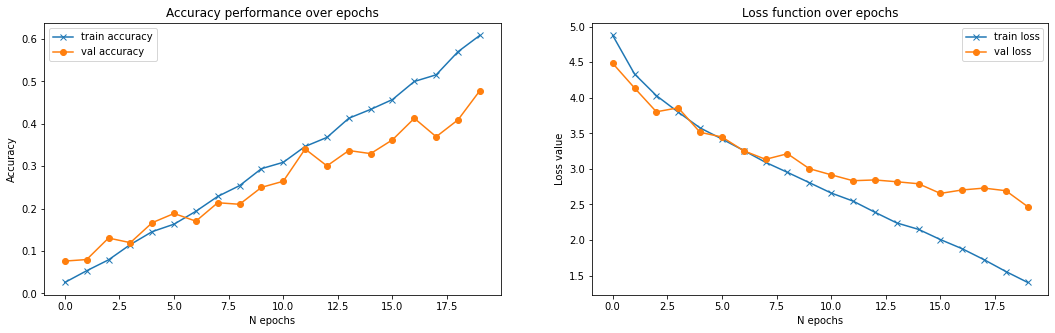

In [ ]:
# Plot results
plot_performance(cnn_sgd_lr001_performance[1],cnn_sgd_lr001_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.41481485962867737


# **MobileNet-v2, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.001, epochs:20**

In [ ]:
model_mobilenetv2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)
model_mobilenetv2.Linear = nn.Linear(1280,90)
model_mobilenetv2.eval()
cnn_sgd_lr01_performance = fit_model(model_mobilenetv2,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:5.271


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.476


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.206


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.074


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.929


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.827


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.722


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.589


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.510


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.407


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.283


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.179


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.088


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.008


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.917


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.814


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.739


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.657


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.573


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.489
Finished Training


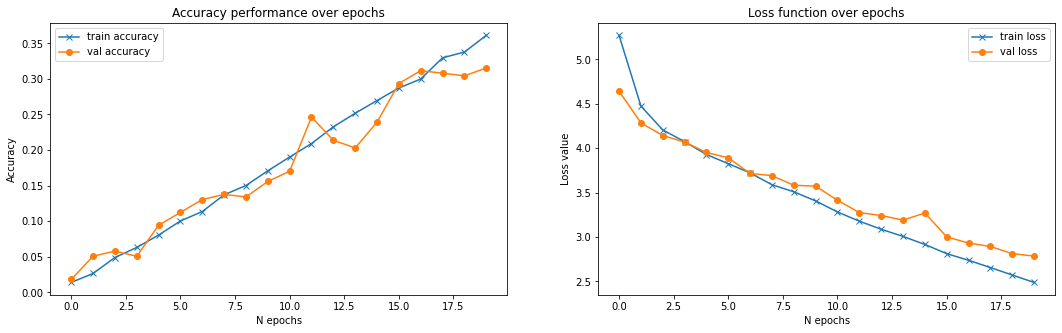

In [ ]:
# Plot results
plot_performance(cnn_sgd_lr01_performance[1],cnn_sgd_lr01_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.30185186862945557


# **MobileNet-v2, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.01, epochs:20**

In [ ]:
model_mobilenetv2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)
model_mobilenetv2.Linear = nn.Linear(1280,90)
model_mobilenetv2.eval()
cnn_adam_lr001_performance = fit_model(model_mobilenetv2,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.786


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.463


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.398


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.316


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.311


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.240


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.218


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.157


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.134


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.113


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.068


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.037


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.013


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.988


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.964


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.935


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.914


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.847


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.840


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.810
Finished Training


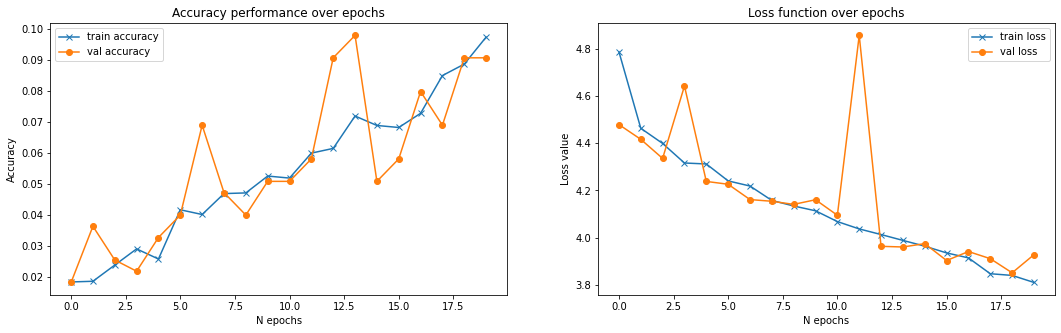

In [ ]:
# Plot results
plot_performance(cnn_adam_lr001_performance[1],cnn_adam_lr001_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.08518519252538681


# **MobileNet-v2, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.001, epochs:20**

In [ ]:
model_mobilenetv2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)
model_mobilenetv2.Linear = nn.Linear(1280,90)
model_mobilenetv2.eval()
cnn_adam_lr01_performance = fit_model(model_mobilenetv2,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.537


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.112


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.946


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.863


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.725


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.619


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.513


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.438


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.358


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.243


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.155


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.077


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.976


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.825


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.767


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.619


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.539


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.444


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.343


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.265
Finished Training


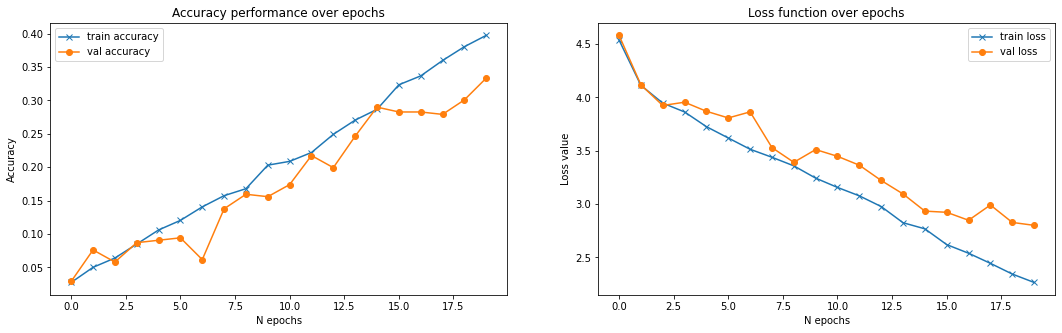

In [ ]:
# Plot results
plot_performance(cnn_adam_lr01_performance[1],cnn_adam_lr01_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.3037036955356598


# **MobileNet-v2 pretrained Model**

In [ ]:
model_mobilenetv2_pt = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model_mobilenetv2_pt.Linear = nn.Linear(1280,90)
model_mobilenetv2_pt.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

# **MobileNet-v2 pretrained, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.01, epochs:20**

In [ ]:
cnn_sgd_lr001_performance = fit_model(model_mobilenetv2_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.810


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.949


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.602


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.309


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.076


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.912


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.675


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.507


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.338


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.166


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.016


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.871


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.730


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.608


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.518


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.437


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.324


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.235


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.167


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.089
Finished Training


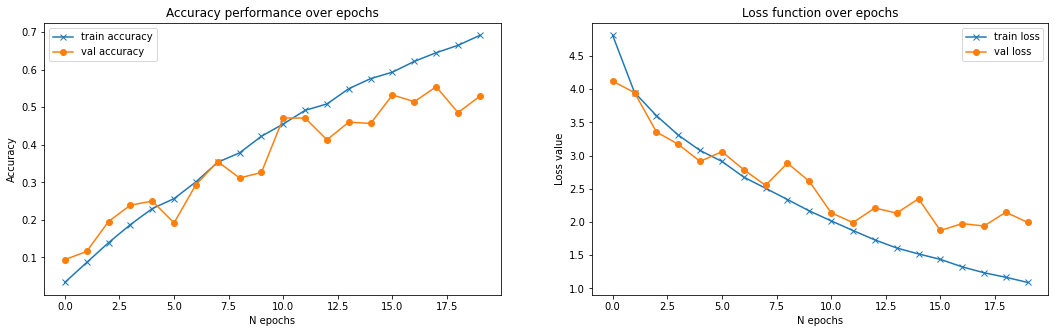

In [ ]:
# Plot results
plot_performance(cnn_sgd_lr001_performance[1],cnn_sgd_lr001_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.5277777910232544


# **MobileNet-v2 pretrained, Loss function: Cross entropy, Optimizer: SGD, learning rate:0.001, epochs:20**

In [ ]:
model_mobilenetv2_pt = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model_mobilenetv2_pt.Linear = nn.Linear(1280,90)
model_mobilenetv2_pt.eval()
cnn_sgd_lr01_performance = fit_model(model_mobilenetv2_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'SGD',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.813


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.236


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.699


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.413


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.258


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.167


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.121


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.089


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.070


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.058


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.043


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.034


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.034


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.027


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.022


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.021


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.020


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.020


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.017


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.016
Finished Training


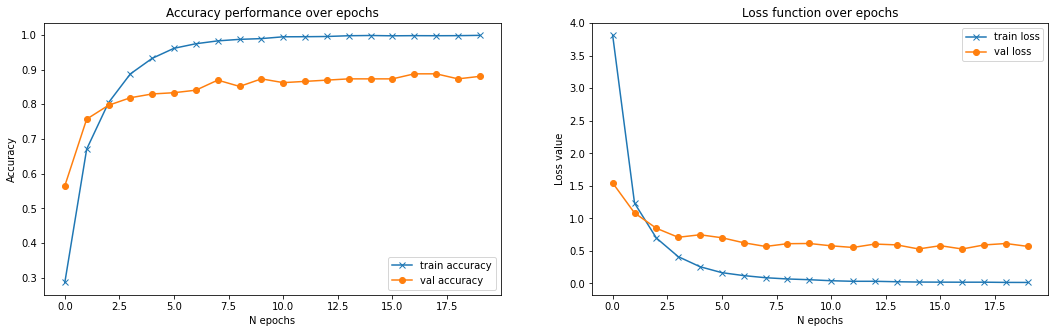

In [ ]:
# Plot results
plot_performance(cnn_sgd_lr01_performance[1],cnn_sgd_lr01_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_sgd_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.8777776956558228


# **MobileNet-v2 pretrained, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.01, epochs:20**

In [ ]:
model_mobilenetv2_pt = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model_mobilenetv2_pt.Linear = nn.Linear(1280,90)
model_mobilenetv2_pt.eval()
cnn_adam_lr001_performance = fit_model(model_mobilenetv2_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.01)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:5.006


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.474


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.367


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.292


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.175


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.152


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.092


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.265


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.281


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.098


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.052


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:4.021


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.978


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.948


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.878


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.886


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.807


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.800


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.753


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.705
Finished Training


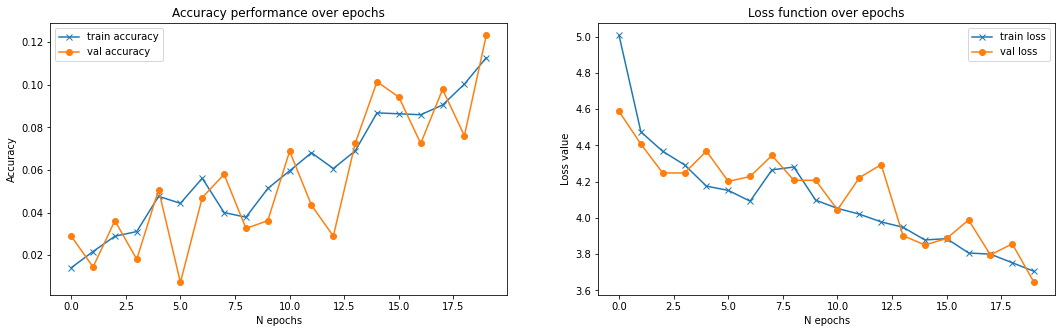

In [ ]:
# Plot results
plot_performance(cnn_adam_lr001_performance[1],cnn_adam_lr001_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr001_performance[3][0].cpu()}')

Accuracy in testing is: 0.13703705370426178


# **MobileNet-v2 pretrained, Loss function: Cross entropy, Optimizer: Adam, learning rate:0.001, epochs:20**

In [ ]:
model_mobilenetv2_pt = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model_mobilenetv2_pt.Linear = nn.Linear(1280,90)
model_mobilenetv2_pt.eval()
cnn_adam_lr01_performance = fit_model(model_mobilenetv2_pt,train_loader = train_loader,val_loader = val_loader,test_loader =test_loader,optimization = 'Adam',loss_function = 'Cross-entropy',epochs = 20,learning_rate = 0.001)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:3.908


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:2.443


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.994


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.669


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.434


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.283


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.136


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:1.021


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.944


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.842


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.743


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.710


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.637


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.581


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.563


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.594


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.521


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.508


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.521


  0%|          | 0/383 [00:00<?, ?it/s]

[loss in training]:0.455
Finished Training


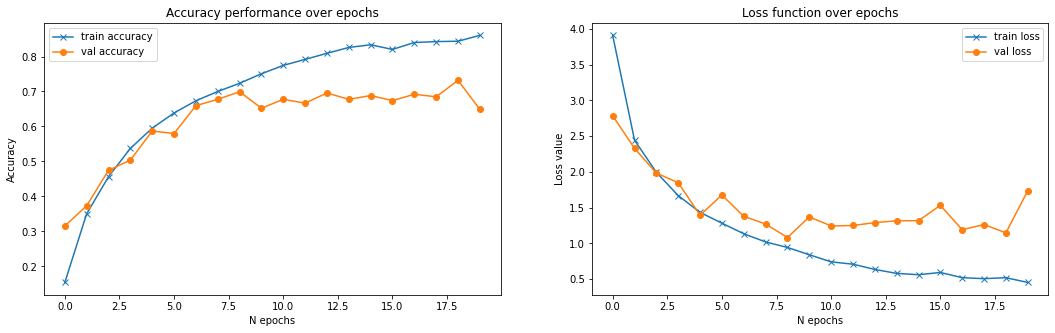

In [ ]:
# Plot results
plot_performance(cnn_adam_lr01_performance[1],cnn_adam_lr01_performance[2])

In [ ]:
# Reporting test accuracy
print(f'Accuracy in testing is: {cnn_adam_lr01_performance[3][0].cpu()}')

Accuracy in testing is: 0.6814814805984497
